# **Klasifikasi Dan BaggingClassifier Pada Dataset Ecoli**

In [55]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

print("Libraries berhasil diimport!")

Libraries berhasil diimport!


## **1. Klasifikasi Ecoli Menggunakan Naive Bayes**

### **1.1 Pengambilan Data**

In [56]:

print("="*60)
print("LOAD DATA ORIGINAL ")
print("="*60)

#  load data original
df_original = pd.read_csv('data_original.csv')
X_all = df_original.iloc[:, :-2]  # All columns except class_encoded and class_name
y_all = df_original.iloc[:, -2]   # class_encoded column

print("Data yang dimuat:")
print(f"  Total samples: {len(X_all)}")
print(f"  Features: {X_all.shape[1]}")
print(f"  Classes: {len(set(y_all))}")

print("\nDistribusi kelas ORIGINAL:")
class_counts = Counter(y_all)
for class_id, count in sorted(class_counts.items()):
    percentage = (count/len(y_all))*100
    print(f"  Class {class_id}: {count:3d} samples ({percentage:5.1f}%)")



LOAD DATA ORIGINAL 
Data yang dimuat:
  Total samples: 336
  Features: 7
  Classes: 8

Distribusi kelas ORIGINAL:
  Class 0: 143 samples ( 42.6%)
  Class 1:  77 samples ( 22.9%)
  Class 2:   2 samples (  0.6%)
  Class 3:   2 samples (  0.6%)
  Class 4:  35 samples ( 10.4%)
  Class 5:  20 samples (  6.0%)
  Class 6:   5 samples (  1.5%)
  Class 7:  52 samples ( 15.5%)


In [57]:
# Validasi data untuk deteksi overfitting
print("="*60)
print("VALIDASI DATA UNTUK DETEKSI OVERFITTING")
print("="*60)

# Cek apakah ada duplikasi dalam dataset
print("Cek duplikasi data ORIGINAL:")
print(f"Total samples: {len(df_original)}")
print(f"Unique samples: {len(df_original.drop_duplicates())}")
print(f"Duplikasi: {len(df_original) - len(df_original.drop_duplicates())} samples")

# Cek distribusi kelas yang tidak seimbang
print(f"\nDistribusi kelas yang sangat tidak seimbang:")
class_counts = Counter(y_all)  # Menggunakan y_all yang sudah didefinisikan
total_samples = len(y_all)
for class_name, count in sorted(class_counts.items()):
    percentage = (count / total_samples) * 100
    print(f"  Class {class_name}: {count} samples ({percentage:.1f}%)")


VALIDASI DATA UNTUK DETEKSI OVERFITTING
Cek duplikasi data ORIGINAL:
Total samples: 336
Unique samples: 336
Duplikasi: 0 samples

Distribusi kelas yang sangat tidak seimbang:
  Class 0: 143 samples (42.6%)
  Class 1: 77 samples (22.9%)
  Class 2: 2 samples (0.6%)
  Class 3: 2 samples (0.6%)
  Class 4: 35 samples (10.4%)
  Class 5: 20 samples (6.0%)
  Class 6: 5 samples (1.5%)
  Class 7: 52 samples (15.5%)


### **1.2 Klasifikasi Naive Bayes pada Data Original**

In [58]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA ORIGINAL")
print("="*60)

# PERBAIKAN: Split data original dulu, baru balancing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Split data original dengan stratify untuk mempertahankan distribusi kelas
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(
    X_all, y_all, test_size=0.3, random_state=42, stratify=y_all
)

print(f"Training set: {len(X_train_orig)} samples")
print(f"Test set: {len(X_test_orig)} samples")

print(f"\nDistribusi training set:")
train_counts = Counter(y_train_orig)
for class_id, count in sorted(train_counts.items()):
    print(f"  Class {class_id}: {count} samples")

print(f"\nDistribusi test set:")
test_counts = Counter(y_test_orig)
for class_id, count in sorted(test_counts.items()):
    print(f"  Class {class_id}: {count} samples")

# Naive Bayes pada data original (tanpa balancing)
nb_orig = GaussianNB()
nb_orig.fit(X_train_orig, y_train_orig)
y_pred_nb_orig = nb_orig.predict(X_test_orig)
acc_nb_orig = accuracy_score(y_test_orig, y_pred_nb_orig)

print(f"\nAccuracy data ORIGINAL: {acc_nb_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_orig)}/{len(y_test_orig)}")

print("\nClassification Report - ORIGINAL:")
print(classification_report(y_test_orig, y_pred_nb_orig, zero_division=0))


KLASIFIKASI NAIVE BAYES - DATA ORIGINAL
Training set: 235 samples
Test set: 101 samples

Distribusi training set:
  Class 0: 100 samples
  Class 1: 54 samples
  Class 2: 1 samples
  Class 3: 1 samples
  Class 4: 25 samples
  Class 5: 14 samples
  Class 6: 4 samples
  Class 7: 36 samples

Distribusi test set:
  Class 0: 43 samples
  Class 1: 23 samples
  Class 2: 1 samples
  Class 3: 1 samples
  Class 4: 10 samples
  Class 5: 6 samples
  Class 6: 1 samples
  Class 7: 16 samples

Accuracy data ORIGINAL: 0.7822
Misclassified samples: 22/101

Classification Report - ORIGINAL:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.78      0.61      0.68        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.62      0.50      0.56        10
           5       0.00      0.00      0.00         6
           6       0.50      1.00      0.


CONFUSION MATRIX - NAIVE BAYES ORIGINAL


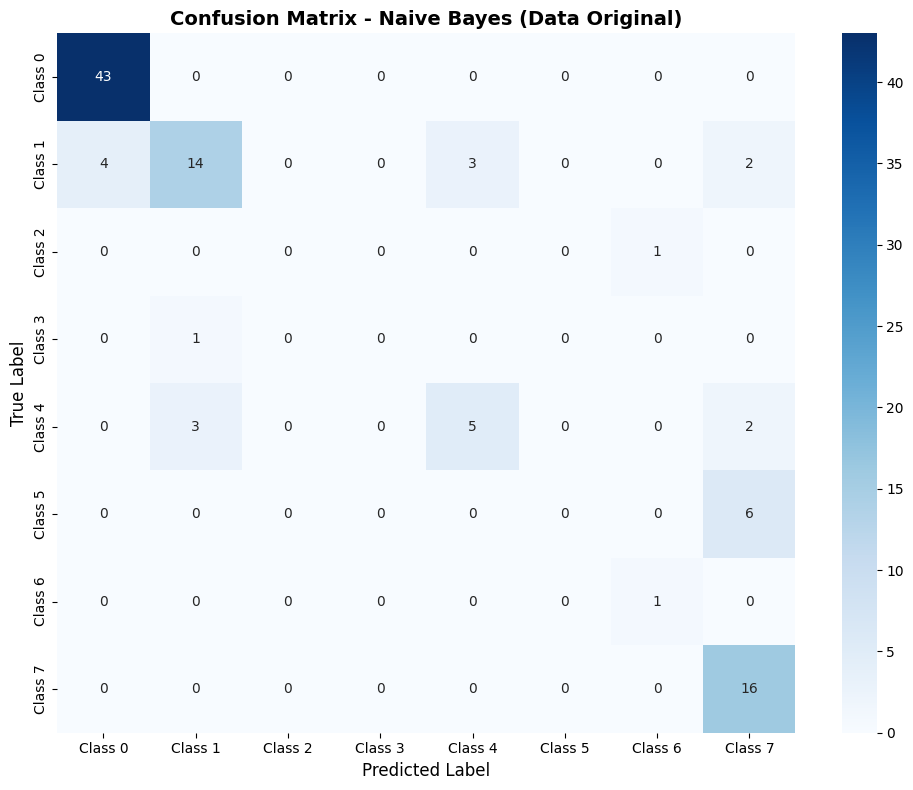


Analisis Detail per Kelas:
----------------------------------------
Class 0: TP=43, FP=4, FN=0, Precision=0.915, Recall=1.000
Class 1: TP=14, FP=4, FN=9, Precision=0.778, Recall=0.609
Class 2: TP=0, FP=0, FN=1, Precision=0.000, Recall=0.000
Class 3: TP=0, FP=0, FN=1, Precision=0.000, Recall=0.000
Class 4: TP=5, FP=3, FN=5, Precision=0.625, Recall=0.500
Class 5: TP=0, FP=0, FN=6, Precision=0.000, Recall=0.000
Class 6: TP=1, FP=1, FN=0, Precision=0.500, Recall=1.000
Class 7: TP=16, FP=10, FN=0, Precision=0.615, Recall=1.000


In [59]:
# Visualisasi Confusion Matrix untuk Naive Bayes - Data Original
print("\n" + "="*60)
print("CONFUSION MATRIX - NAIVE BAYES ORIGINAL")
print("="*60)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hitung confusion matrix
cm_nb_orig = confusion_matrix(y_test_orig, y_pred_nb_orig)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb_orig, annot=True, fmt='d', cmap='Blues', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Naive Bayes (Data Original)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analisis per kelas
print("\nAnalisis Detail per Kelas:")
print("-" * 40)
class_names = [f'Class {i}' for i in range(len(set(y_all)))]
for i, class_name in enumerate(class_names):
    tp = cm_nb_orig[i, i]  # True Positive
    fp = cm_nb_orig[:, i].sum() - tp  # False Positive  
    fn = cm_nb_orig[i, :].sum() - tp  # False Negative
    tn = cm_nb_orig.sum() - tp - fp - fn  # True Negative
    
    if tp + fp > 0:
        precision = tp / (tp + fp)
    else:
        precision = 0.0
        
    if tp + fn > 0:
        recall = tp / (tp + fn)
    else:
        recall = 0.0
    
    print(f"{class_name}: TP={tp}, FP={fp}, FN={fn}, Precision={precision:.3f}, Recall={recall:.3f}")

### **1.3 Klasifikasi Naive Bayes pada Data SMOTE**

In [60]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA SMOTE ")
print("="*60)

# PERBAIKAN: Buat SMOTE data HANYA dari training set
from imblearn.over_sampling import SMOTE, RandomOverSampler

print("Membuat SMOTE data dari TRAINING SET saja...")
print(f"Training set original: {len(X_train_orig)} samples")

print(f"\nDistribusi training set:")
for class_id, count in sorted(train_counts.items()):
    print(f"  Class {class_id}: {count} samples")

# Cek kelas dengan sampel sedikit
min_samples = min(train_counts.values())
print(f"\nMinimum samples per class: {min_samples}")

try:
    if min_samples >= 2:
        # Jika ada minimal 2 sampel per kelas, gunakan SMOTE
        smote = SMOTE(k_neighbors=min(1, min_samples-1), random_state=123)
        X_train_smote, y_train_smote = smote.fit_resample(X_train_orig, y_train_orig)
        method_used = "SMOTE"
    else:
        # Jika ada kelas dengan 1 sampel, gunakan RandomOverSampler
        print("Menggunakan RandomOverSampler karena ada kelas dengan 1 sampel")
        ros = RandomOverSampler(random_state=123)
        X_train_smote, y_train_smote = ros.fit_resample(X_train_orig, y_train_orig)
        method_used = "RandomOverSampler"
    
    print(f"Training set setelah {method_used}: {len(X_train_smote)} samples")
    print(f"Sampel yang di-generate: {len(X_train_smote) - len(X_train_orig)}")
    
    print(f"\nDistribusi training {method_used}:")
    smote_counts = Counter(y_train_smote)
    for class_id, count in sorted(smote_counts.items()):
        original_count = train_counts.get(class_id, 0)
        generated = count - original_count
        print(f"  Class {class_id}: {count} samples (orig: {original_count}, gen: {generated})")
    
    # Naive Bayes pada balanced data (test set tetap original)
    nb_smote = GaussianNB()
    nb_smote.fit(X_train_smote, y_train_smote)
    y_pred_nb_smote = nb_smote.predict(X_test_orig)  # Test dengan data original!
    acc_nb_smote = accuracy_score(y_test_orig, y_pred_nb_smote)
    
    print(f"\nAccuracy data {method_used}: {acc_nb_smote:.4f}")
    print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_smote)}/{len(y_test_orig)}")
    
    print(f"\nCatatan: Test set menggunakan data ORIGINAL (bukan {method_used})")
    print(f"Classification Report - {method_used}:")
    print(classification_report(y_test_orig, y_pred_nb_smote, zero_division=0))
    
except Exception as e:
    print(f"Balancing gagal: {e}")
    # Fallback ke data original
    X_train_smote, y_train_smote = X_train_orig.copy(), y_train_orig.copy()
    acc_nb_smote = acc_nb_orig
    print("Menggunakan data original sebagai fallback")


KLASIFIKASI NAIVE BAYES - DATA SMOTE 
Membuat SMOTE data dari TRAINING SET saja...
Training set original: 235 samples

Distribusi training set:
  Class 0: 100 samples
  Class 1: 54 samples
  Class 2: 1 samples
  Class 3: 1 samples
  Class 4: 25 samples
  Class 5: 14 samples
  Class 6: 4 samples
  Class 7: 36 samples

Minimum samples per class: 1
Menggunakan RandomOverSampler karena ada kelas dengan 1 sampel
Training set setelah RandomOverSampler: 800 samples
Sampel yang di-generate: 565

Distribusi training RandomOverSampler:
  Class 0: 100 samples (orig: 100, gen: 0)
  Class 1: 100 samples (orig: 54, gen: 46)
  Class 2: 100 samples (orig: 1, gen: 99)
  Class 3: 100 samples (orig: 1, gen: 99)
  Class 4: 100 samples (orig: 25, gen: 75)
  Class 5: 100 samples (orig: 14, gen: 86)
  Class 6: 100 samples (orig: 4, gen: 96)
  Class 7: 100 samples (orig: 36, gen: 64)

Accuracy data RandomOverSampler: 0.7723
Misclassified samples: 23/101

Catatan: Test set menggunakan data ORIGINAL (bukan Ran


CONFUSION MATRIX - NAIVE BAYES BALANCED


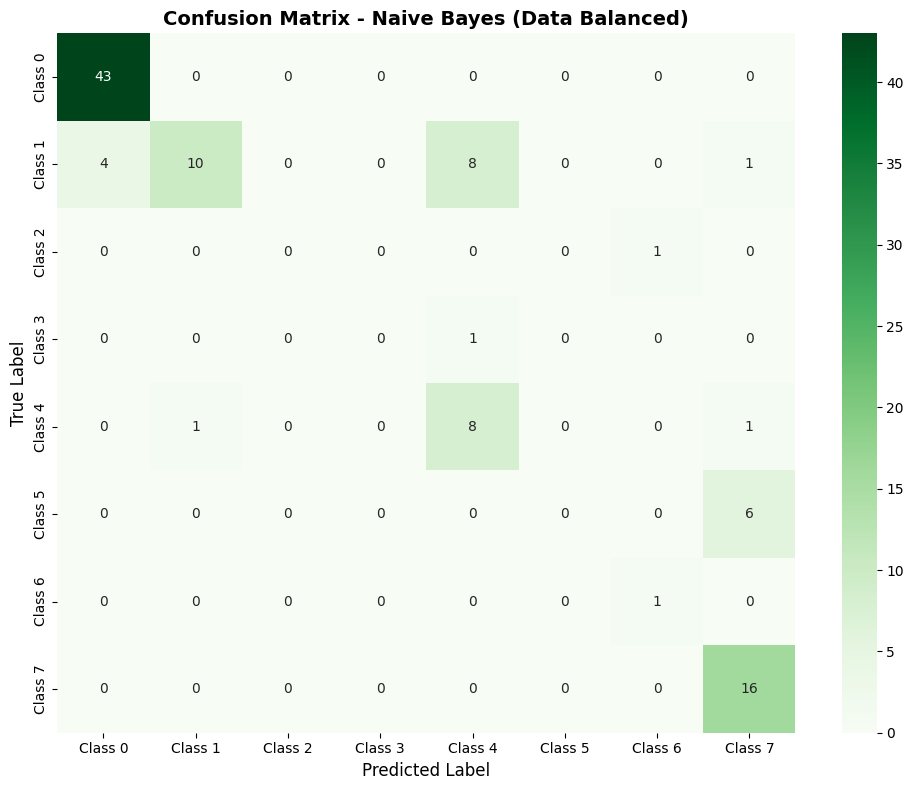


Perbandingan dengan Data Original:
----------------------------------------
Class 0: Original=1.000, Balanced=1.000, Improvement=+0.000
Class 1: Original=0.609, Balanced=0.435, Improvement=-0.174
Class 2: Original=0.000, Balanced=0.000, Improvement=+0.000
Class 3: Original=0.000, Balanced=0.000, Improvement=+0.000
Class 4: Original=0.500, Balanced=0.800, Improvement=+0.300
Class 5: Original=0.000, Balanced=0.000, Improvement=+0.000
Class 6: Original=1.000, Balanced=1.000, Improvement=+0.000
Class 7: Original=1.000, Balanced=1.000, Improvement=+0.000


In [61]:
# Visualisasi Confusion Matrix untuk Naive Bayes - Data Balanced
print("\n" + "="*60)
print("CONFUSION MATRIX - NAIVE BAYES BALANCED")
print("="*60)

# Hitung confusion matrix
cm_nb_smote = confusion_matrix(y_test_orig, y_pred_nb_smote)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_nb_smote, annot=True, fmt='d', cmap='Greens', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Naive Bayes (Data Balanced)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Perbandingan dengan Original
print("\nPerbandingan dengan Data Original:")
print("-" * 40)
for i, class_name in enumerate([f'Class {i}' for i in range(len(set(y_all)))]):
    tp_orig = cm_nb_orig[i, i]
    tp_smote = cm_nb_smote[i, i]
    support = test_counts.get(i, 0)
    
    if support > 0:
        acc_orig = tp_orig / support
        acc_smote = tp_smote / support
        improvement = acc_smote - acc_orig
        print(f"{class_name}: Original={acc_orig:.3f}, Balanced={acc_smote:.3f}, Improvement={improvement:+.3f}")
    else:
        print(f"{class_name}: No test samples")

### **1.4 Klasifikasi Naive Bayes pada Data ADASYN**

In [62]:
print("\n" + "="*60)
print("KLASIFIKASI NAIVE BAYES - DATA ADASYN (CORRECTED)")
print("="*60)


from imblearn.over_sampling import ADASYN

print("Membuat ADASYN data dari TRAINING SET saja...")
print(f"Training set original: {len(X_train_orig)} samples")

try:
    # Apply ADASYN hanya pada training set dengan k_neighbors yang aman
    adasyn = ADASYN(n_neighbors=1, random_state=456)
    X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_orig, y_train_orig)
    
    print(f"Training set setelah ADASYN: {len(X_train_adasyn)} samples")
    print(f"Sampel yang di-generate: {len(X_train_adasyn) - len(X_train_orig)}")
    
    print(f"\nDistribusi training ADASYN:")
    adasyn_counts = Counter(y_train_adasyn)
    for class_id, count in sorted(adasyn_counts.items()):
        original_count = train_counts.get(class_id, 0)
        generated = count - original_count
        print(f"  Class {class_id}: {count} samples (orig: {original_count}, gen: {generated})")
    
    # Naive Bayes pada ADASYN data 
    nb_adasyn = GaussianNB()
    nb_adasyn.fit(X_train_adasyn, y_train_adasyn)
    y_pred_nb_adasyn = nb_adasyn.predict(X_test_orig)  # Test dengan data original!
    acc_nb_adasyn = accuracy_score(y_test_orig, y_pred_nb_adasyn)
    
    print(f"\nAccuracy data ADASYN: {acc_nb_adasyn:.4f}")
    print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_nb_adasyn)}/{len(y_test_orig)}")
    
    print("\nCatatan: Test set menggunakan data ORIGINAL (bukan ADASYN)")
    print("Classification Report - ADASYN:")
    print(classification_report(y_test_orig, y_pred_nb_adasyn, zero_division=0))
    
except Exception as e:
    print(f"ADASYN gagal: {e}")
    # Fallback ke data original
    X_train_adasyn, y_train_adasyn = X_train_orig.copy(), y_train_orig.copy()
    acc_nb_adasyn = acc_nb_orig
    print("Menggunakan data original sebagai fallback")


KLASIFIKASI NAIVE BAYES - DATA ADASYN (CORRECTED)
Membuat ADASYN data dari TRAINING SET saja...
Training set original: 235 samples
ADASYN gagal: Expected n_neighbors <= n_samples_fit, but n_neighbors = 2, n_samples_fit = 1, n_samples = 1
Menggunakan data original sebagai fallback


### **1.5 Perbandingan Accuracy Naive Bayes**


PERBANDINGAN ACCURACY NAIVE BAYES
Akurasi Original  : 0.7822
Akurasi SMOTE     : 0.7723
Akurasi ADASYN    : 0.7822


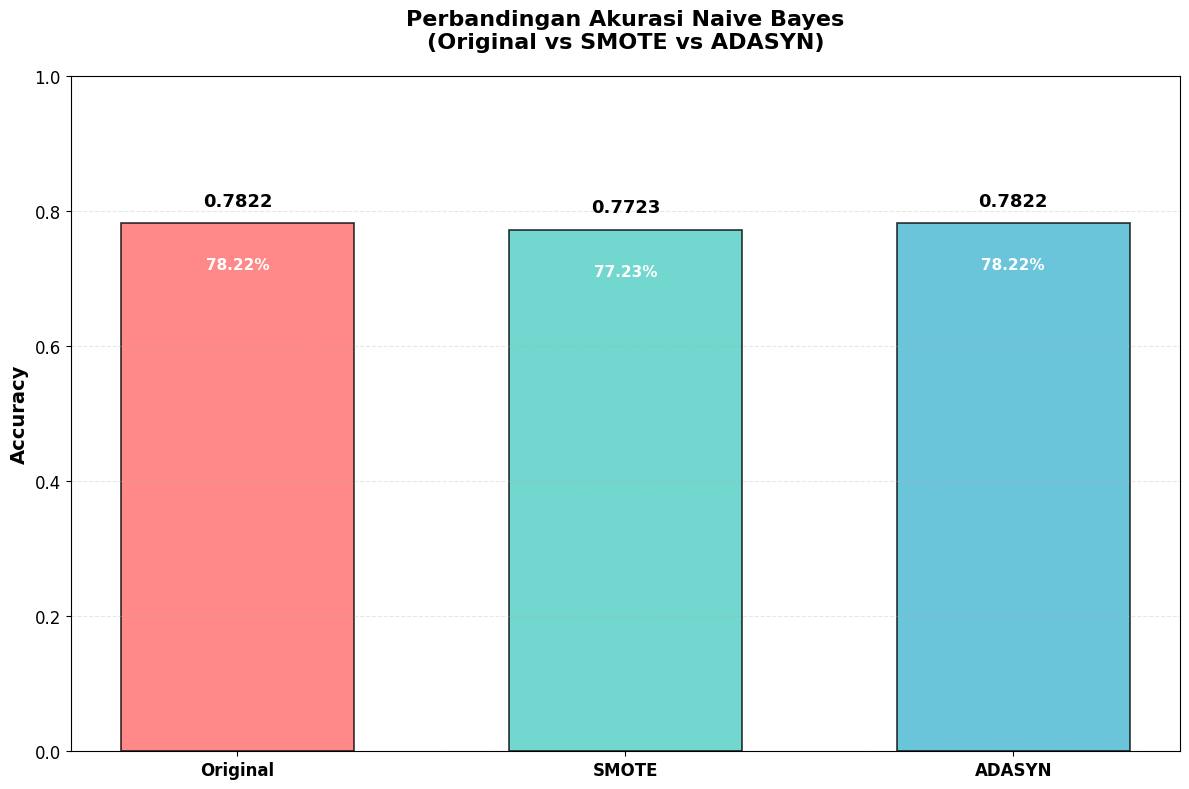

In [63]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY NAIVE BAYES")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
nb_accuracies = [acc_nb_orig, acc_nb_smote, acc_nb_adasyn]

print(f"Akurasi Original  : {acc_nb_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_nb_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_nb_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, nb_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Naive Bayes\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, nb_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **2. Klasifikasi Ecoli Menggunakan Random Forest**

### **2.1 Klasifikasi Random Forest pada Data Original**

In [64]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA ORIGINAL")
print("="*60)

from sklearn.ensemble import RandomForestClassifier

# Random Forest dengan parameter yang lebih konservatif untuk menghindari overfitting
rf_orig = RandomForestClassifier(
    n_estimators=50,           # Lebih sedikit trees
    max_depth=5,              # Membatasi kedalaman
    min_samples_split=10,     # Minimal sampel untuk split
    min_samples_leaf=5,       # Minimal sampel di leaf
    random_state=42
)
rf_orig.fit(X_train_orig, y_train_orig)
y_pred_rf_orig = rf_orig.predict(X_test_orig)
acc_rf_orig = accuracy_score(y_test_orig, y_pred_rf_orig)

print(f"Accuracy data ORIGINAL: {acc_rf_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_orig)}/{len(y_test_orig)}")

print("\nClassification Report - ORIGINAL:")
print(classification_report(y_test_orig, y_pred_rf_orig, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA ORIGINAL
Accuracy data ORIGINAL: 0.8020
Misclassified samples: 20/101

Classification Report - ORIGINAL:
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.73      0.70      0.71        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.46      0.60      0.52        10
           5       1.00      0.83      0.91         6
           6       0.00      0.00      0.00         1
           7       0.92      0.69      0.79        16

    accuracy                           0.80       101
   macro avg       0.50      0.48      0.48       101
weighted avg       0.79      0.80      0.79       101




CONFUSION MATRIX - RANDOM FOREST ORIGINAL


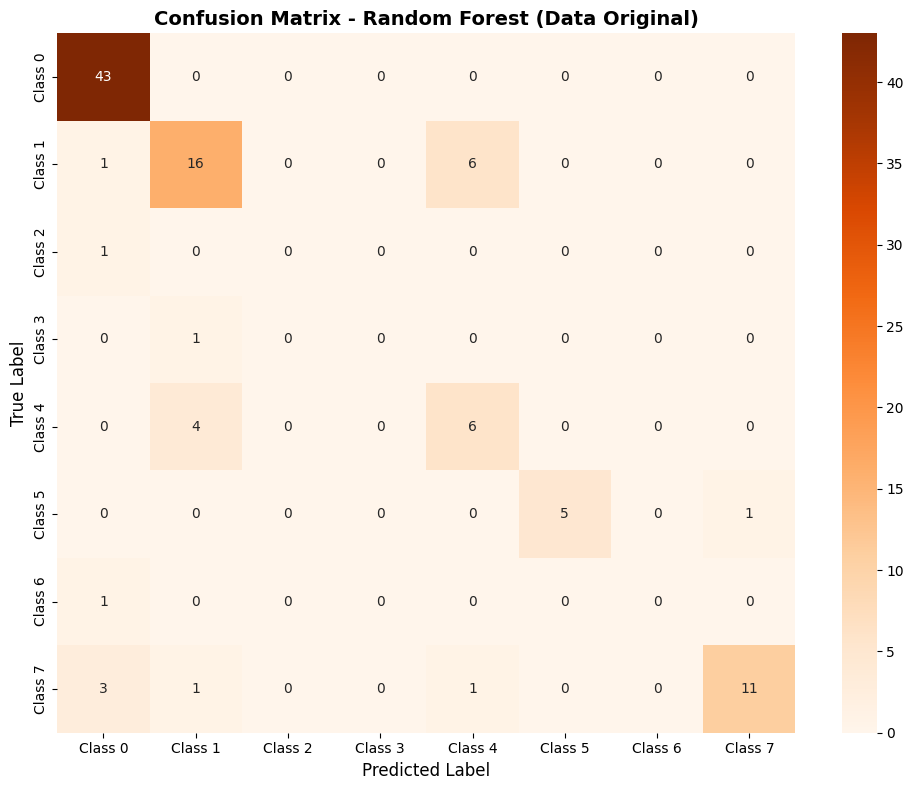


Perbandingan dengan Naive Bayes:
----------------------------------------
Class 0: NB=1.000, RF=1.000, Diff=+0.000 = Same
Class 1: NB=0.609, RF=0.696, Diff=+0.087 ↑ Better
Class 2: NB=0.000, RF=0.000, Diff=+0.000 = Same
Class 3: NB=0.000, RF=0.000, Diff=+0.000 = Same
Class 4: NB=0.500, RF=0.600, Diff=+0.100 ↑ Better
Class 5: NB=0.000, RF=0.833, Diff=+0.833 ↑ Better
Class 6: NB=1.000, RF=0.000, Diff=-1.000 ↓ Worse
Class 7: NB=1.000, RF=0.688, Diff=-0.312 ↓ Worse


In [65]:
# Visualisasi Confusion Matrix untuk Random Forest - Data Original
print("\n" + "="*60)
print("CONFUSION MATRIX - RANDOM FOREST ORIGINAL")
print("="*60)

# Hitung confusion matrix
cm_rf_orig = confusion_matrix(y_test_orig, y_pred_rf_orig)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf_orig, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Random Forest (Data Original)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Perbandingan dengan Naive Bayes
print("\nPerbandingan dengan Naive Bayes:")
print("-" * 40)
for i, class_name in enumerate([f'Class {i}' for i in range(len(set(y_all)))]):
    tp_nb = cm_nb_orig[i, i]
    tp_rf = cm_rf_orig[i, i]
    support = test_counts.get(i, 0)
    
    if support > 0:
        acc_nb = tp_nb / support
        acc_rf = tp_rf / support
        improvement = acc_rf - acc_nb
        status = "↑ Better" if improvement > 0 else "↓ Worse" if improvement < 0 else "= Same"
        print(f"{class_name}: NB={acc_nb:.3f}, RF={acc_rf:.3f}, Diff={improvement:+.3f} {status}")
    else:
        print(f"{class_name}: No test samples")

### **2.2 Klasifikasi Random Forest pada Data SMOTE**

In [66]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA BALANCED (CORRECTED)")
print("="*60)

# Random Forest dengan parameter yang lebih konservatif pada data balanced
rf_smote = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=123  # Random state berbeda
)

# Train dengan balanced data, test dengan original data
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_orig)  # Test dengan data original!
acc_rf_smote = accuracy_score(y_test_orig, y_pred_rf_smote)

print(f"Accuracy data BALANCED: {acc_rf_smote:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_smote)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan Balanced data, Testing dengan data ORIGINAL")
print("Classification Report - BALANCED:")
print(classification_report(y_test_orig, y_pred_rf_smote, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA BALANCED (CORRECTED)
Accuracy data BALANCED: 0.8416
Misclassified samples: 16/101

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report - BALANCED:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.76      0.70      0.73        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.53      0.80      0.64        10
           5       1.00      1.00      1.00         6
           6       0.50      1.00      0.67         1
           7       1.00      0.69      0.81        16

    accuracy                           0.84       101
   macro avg       0.59      0.65      0.60       101
weighted avg       0.85      0.84      0.84       101




CONFUSION MATRIX - RANDOM FOREST BALANCED


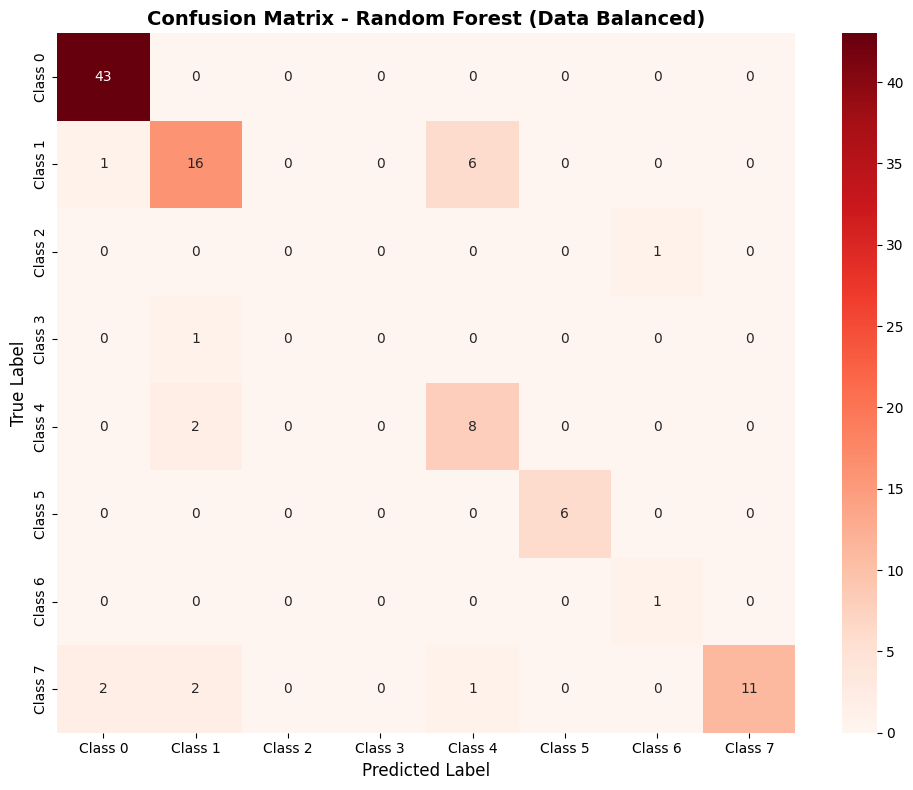


Efek Balancing pada Random Forest:
----------------------------------------
Class 0: Orig=1.000, Balanced=1.000, Change=+0.000 🔴 Declined
Class 1: Orig=0.696, Balanced=0.696, Change=+0.000 🔴 Declined
Class 2: Orig=0.000, Balanced=0.000, Change=+0.000 🔴 Declined
Class 3: Orig=0.000, Balanced=0.000, Change=+0.000 🔴 Declined
Class 4: Orig=0.600, Balanced=0.800, Change=+0.200 🟢 Improved
Class 5: Orig=0.833, Balanced=1.000, Change=+0.167 🟢 Improved
Class 6: Orig=0.000, Balanced=1.000, Change=+1.000 🟢 Improved
Class 7: Orig=0.688, Balanced=0.688, Change=+0.000 🔴 Declined


In [67]:
# Visualisasi Confusion Matrix untuk Random Forest - Data Balanced
print("\n" + "="*60)
print("CONFUSION MATRIX - RANDOM FOREST BALANCED")
print("="*60)

# Hitung confusion matrix
cm_rf_smote = confusion_matrix(y_test_orig, y_pred_rf_smote)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Reds', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Random Forest (Data Balanced)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analisis improvement dari balancing
print("\nEfek Balancing pada Random Forest:")
print("-" * 40)
for i, class_name in enumerate([f'Class {i}' for i in range(len(set(y_all)))]):
    tp_orig = cm_rf_orig[i, i]
    tp_balanced = cm_rf_smote[i, i]
    support = test_counts.get(i, 0)
    
    if support > 0:
        acc_orig = tp_orig / support
        acc_balanced = tp_balanced / support
        improvement = acc_balanced - acc_orig
        status = "🟢 Improved" if improvement > 0.1 else "🟡 Slight" if improvement > 0 else "🔴 Declined"
        print(f"{class_name}: Orig={acc_orig:.3f}, Balanced={acc_balanced:.3f}, Change={improvement:+.3f} {status}")
    else:
        print(f"{class_name}: No test samples")

### **2.3 Klasifikasi Random Forest pada Data ADASYN**

In [68]:
print("\n" + "="*60)
print("KLASIFIKASI RANDOM FOREST - DATA ADASYN (CORRECTED)")
print("="*60)

# Random Forest dengan parameter yang lebih konservatif pada data ADASYN
rf_adasyn = RandomForestClassifier(
    n_estimators=50,
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=456  # Random state berbeda lagi
)

# Train dengan ADASYN data, test dengan original data
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_rf_adasyn = rf_adasyn.predict(X_test_orig)  # Test dengan data original!
acc_rf_adasyn = accuracy_score(y_test_orig, y_pred_rf_adasyn)

print(f"Accuracy data ADASYN: {acc_rf_adasyn:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_rf_adasyn)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan ADASYN data, Testing dengan data ORIGINAL")
print("Classification Report - ADASYN:")
print(classification_report(y_test_orig, y_pred_rf_adasyn, zero_division=0))


KLASIFIKASI RANDOM FOREST - DATA ADASYN (CORRECTED)
Accuracy data ADASYN: 0.8218
Misclassified samples: 18/101

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report - ADASYN:
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.70      0.70      0.70        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.60      0.55        10
           5       1.00      1.00      1.00         6
           6       0.00      0.00      0.00         1
           7       0.92      0.75      0.83        16

    accuracy                           0.82       101
   macro avg       0.50      0.51      0.50       101
weighted avg       0.80      0.82      0.81       101

              precision    recall  f1-score   support

           0       0.91      1.00      0.96        43
           1       0.70     

### **2.4 Perbandingan Accuracy Random Forest**


PERBANDINGAN ACCURACY RANDOM FOREST
Akurasi Original  : 0.8020
Akurasi SMOTE     : 0.8416
Akurasi ADASYN    : 0.8218


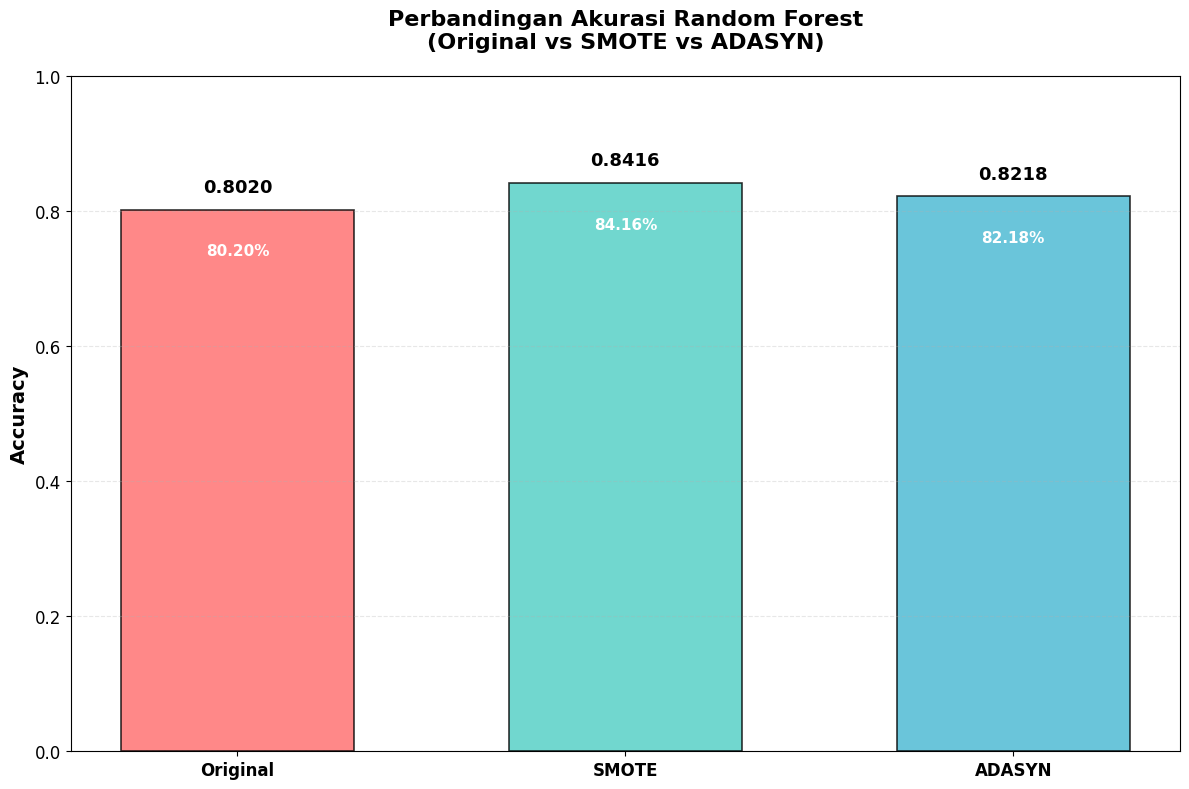

In [69]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY RANDOM FOREST")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
rf_accuracies = [acc_rf_orig, acc_rf_smote, acc_rf_adasyn]

print(f"Akurasi Original  : {acc_rf_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_rf_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_rf_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, rf_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Random Forest\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, rf_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **3. Klasifikasi Ecoli Menggunakan Bagging Classifier**

### **3.1 Bagging Classifier pada Data Original**

In [70]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA ORIGINAL")
print("="*60)

from sklearn.ensemble import BaggingClassifier

# Bagging Classifier dengan parameter yang lebih konservatif
bag_orig = BaggingClassifier(
    n_estimators=20,        # Lebih sedikit estimators
    max_samples=0.8,        # Menggunakan 80% sampel untuk setiap base classifier
    max_features=0.8,       # Menggunakan 80% features
    random_state=42
)
bag_orig.fit(X_train_orig, y_train_orig)
y_pred_bag_orig = bag_orig.predict(X_test_orig)
acc_bag_orig = accuracy_score(y_test_orig, y_pred_bag_orig)

print(f"Accuracy: {acc_bag_orig:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_orig)}/{len(y_test_orig)}")

print("\nClassification Report:")
print(classification_report(y_test_orig, y_pred_bag_orig, zero_division=0))


BAGGING CLASSIFIER - DATA ORIGINAL
Accuracy: 0.8020
Misclassified samples: 20/101

Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.67      0.70      0.68        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.42      0.50      0.45        10
           5       1.00      0.83      0.91         6
           6       0.50      1.00      0.67         1
           7       0.92      0.69      0.79        16

    accuracy                           0.80       101
   macro avg       0.55      0.59      0.56       101
weighted avg       0.80      0.80      0.80       101




CONFUSION MATRIX - BAGGING CLASSIFIER ORIGINAL


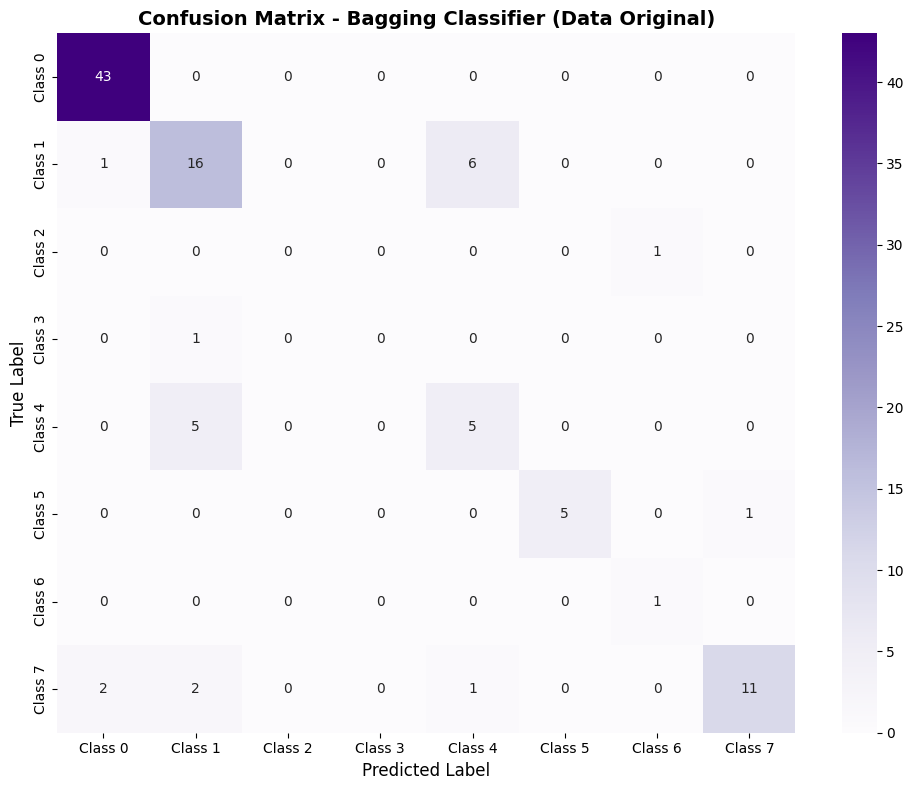


Perbandingan Bagging vs Random Forest:
----------------------------------------
Class 0: RF=1.000, Bagging=1.000, Winner=Tie
Class 1: RF=0.696, Bagging=0.696, Winner=Tie
Class 2: RF=0.000, Bagging=0.000, Winner=Tie
Class 3: RF=0.000, Bagging=0.000, Winner=Tie
Class 4: RF=0.600, Bagging=0.500, Winner=RF
Class 5: RF=0.833, Bagging=0.833, Winner=Tie
Class 6: RF=0.000, Bagging=1.000, Winner=Bagging
Class 7: RF=0.688, Bagging=0.688, Winner=Tie


In [71]:
# Visualisasi Confusion Matrix untuk Bagging Classifier - Data Original
print("\n" + "="*60)
print("CONFUSION MATRIX - BAGGING CLASSIFIER ORIGINAL")
print("="*60)

# Hitung confusion matrix
cm_bag_orig = confusion_matrix(y_test_orig, y_pred_bag_orig)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_bag_orig, annot=True, fmt='d', cmap='Purples', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Bagging Classifier (Data Original)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Perbandingan dengan Random Forest
print("\nPerbandingan Bagging vs Random Forest:")
print("-" * 40)
for i, class_name in enumerate([f'Class {i}' for i in range(len(set(y_all)))]):
    tp_rf = cm_rf_orig[i, i]
    tp_bag = cm_bag_orig[i, i]
    support = test_counts.get(i, 0)
    
    if support > 0:
        acc_rf = tp_rf / support
        acc_bag = tp_bag / support
        diff = acc_bag - acc_rf
        winner = "Bagging" if diff > 0 else "RF" if diff < 0 else "Tie"
        print(f"{class_name}: RF={acc_rf:.3f}, Bagging={acc_bag:.3f}, Winner={winner}")
    else:
        print(f"{class_name}: No test samples")

### **3.2 Bagging Classifier pada Data SMOTE**

In [72]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA BALANCED (CORRECTED)")
print("="*60)

# Bagging Classifier dengan parameter yang lebih konservatif pada data balanced
bag_smote = BaggingClassifier(
    n_estimators=20,
    max_samples=0.8,
    max_features=0.8,
    random_state=123  # Random state berbeda
)

# Train dengan balanced data, test dengan original data
bag_smote.fit(X_train_smote, y_train_smote)
y_pred_bag_smote = bag_smote.predict(X_test_orig)  # Test dengan data original!
acc_bag_smote = accuracy_score(y_test_orig, y_pred_bag_smote)

print(f"Accuracy: {acc_bag_smote:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_smote)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan Balanced data, Testing dengan data ORIGINAL")
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_bag_smote, zero_division=0))


BAGGING CLASSIFIER - DATA BALANCED (CORRECTED)
Accuracy: 0.8218
Misclassified samples: 18/101

Catatan: Training dengan Balanced data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.73      0.83      0.78        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.67      0.60      0.63        10
           5       0.71      0.83      0.77         6
           6       0.50      1.00      0.67         1
           7       0.85      0.69      0.76        16

    accuracy                           0.82       101
   macro avg       0.55      0.61      0.57       101
weighted avg       0.81      0.82      0.81       101




CONFUSION MATRIX - BAGGING CLASSIFIER BALANCED


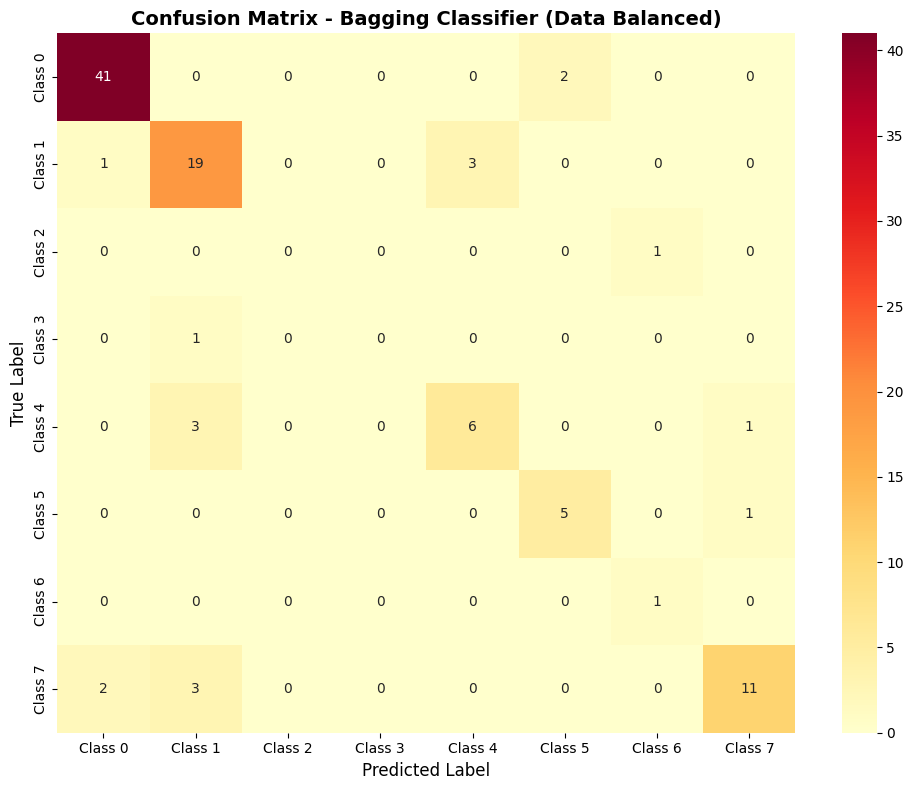


Efek Balancing pada Bagging Classifier:
---------------------------------------------
Class 0: Orig=1.000, Balanced=0.953, Change=-0.047 📉 Worse
Class 1: Orig=0.696, Balanced=0.826, Change=+0.130 📊 Better
Class 2: Orig=0.000, Balanced=0.000, Change=+0.000 📉 Worse
Class 3: Orig=0.000, Balanced=0.000, Change=+0.000 📉 Worse
Class 4: Orig=0.500, Balanced=0.600, Change=+0.100 📊 Better
Class 5: Orig=0.833, Balanced=0.833, Change=+0.000 📉 Worse
Class 6: Orig=1.000, Balanced=1.000, Change=+0.000 📉 Worse
Class 7: Orig=0.688, Balanced=0.688, Change=+0.000 📉 Worse


In [73]:
# Visualisasi Confusion Matrix untuk Bagging Classifier - Data Balanced
print("\n" + "="*60)
print("CONFUSION MATRIX - BAGGING CLASSIFIER BALANCED")
print("="*60)

# Hitung confusion matrix
cm_bag_smote = confusion_matrix(y_test_orig, y_pred_bag_smote)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm_bag_smote, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=[f'Class {i}' for i in range(len(set(y_all)))],
            yticklabels=[f'Class {i}' for i in range(len(set(y_all)))])
plt.title('Confusion Matrix - Bagging Classifier (Data Balanced)', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analisis efek balancing pada Bagging
print("\nEfek Balancing pada Bagging Classifier:")
print("-" * 45)
for i, class_name in enumerate([f'Class {i}' for i in range(len(set(y_all)))]):
    tp_orig = cm_bag_orig[i, i]
    tp_balanced = cm_bag_smote[i, i]
    support = test_counts.get(i, 0)
    
    if support > 0:
        acc_orig = tp_orig / support
        acc_balanced = tp_balanced / support
        improvement = acc_balanced - acc_orig
        status = "📈 Much Better" if improvement > 0.2 else "📊 Better" if improvement > 0 else "📉 Worse"
        print(f"{class_name}: Orig={acc_orig:.3f}, Balanced={acc_balanced:.3f}, Change={improvement:+.3f} {status}")
    else:
        print(f"{class_name}: No test samples")

### **3.3 Bagging Classifier pada Data ADASYN**

In [74]:
print("\n" + "="*60)
print("BAGGING CLASSIFIER - DATA ADASYN (CORRECTED)")
print("="*60)

# Bagging Classifier dengan parameter yang lebih konservatif pada data ADASYN
bag_adasyn = BaggingClassifier(
    n_estimators=20,
    max_samples=0.8,
    max_features=0.8,
    random_state=456  # Random state berbeda lagi
)

# Train dengan ADASYN data, test dengan original data
bag_adasyn.fit(X_train_adasyn, y_train_adasyn)
y_pred_bag_adasyn = bag_adasyn.predict(X_test_orig)  # Test dengan data original!
acc_bag_adasyn = accuracy_score(y_test_orig, y_pred_bag_adasyn)

print(f"Accuracy: {acc_bag_adasyn:.4f}")
print(f"Misclassified samples: {len(y_test_orig) - sum(y_test_orig == y_pred_bag_adasyn)}/{len(y_test_orig)}")

print("\nCatatan: Training dengan ADASYN data, Testing dengan data ORIGINAL")
print("Classification Report:")
print(classification_report(y_test_orig, y_pred_bag_adasyn, zero_division=0))


BAGGING CLASSIFIER - DATA ADASYN (CORRECTED)
Accuracy: 0.8317
Misclassified samples: 17/101

Catatan: Training dengan ADASYN data, Testing dengan data ORIGINAL
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.69      0.78      0.73        23
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.50      0.50      0.50        10
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         1
           7       0.92      0.69      0.79        16

    accuracy                           0.83       101
   macro avg       0.63      0.62      0.62       101
weighted avg       0.82      0.83      0.82       101



### **3.4 Perbandingan Accuracy Bagging Classifier**


PERBANDINGAN ACCURACY BAGGING CLASSIFIER
Akurasi Original  : 0.8020
Akurasi SMOTE     : 0.8218
Akurasi ADASYN    : 0.8317


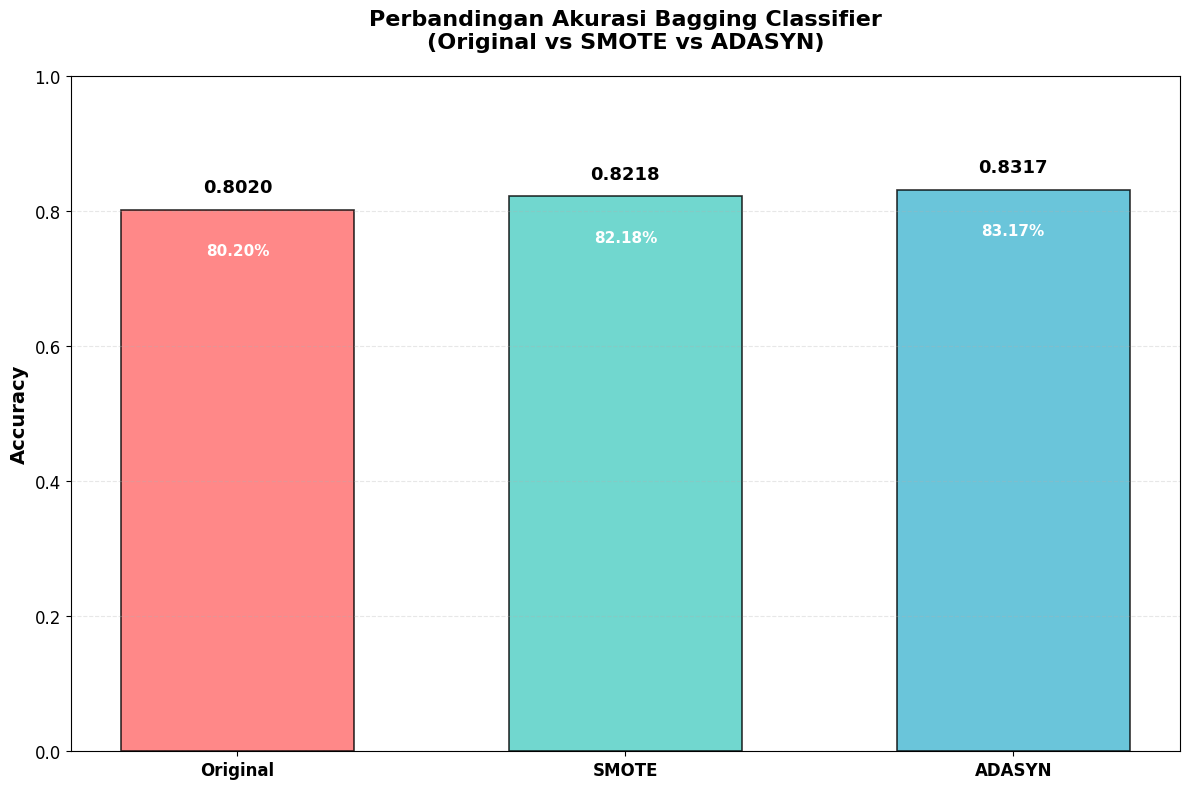

In [75]:
print("\n" + "="*60)
print("PERBANDINGAN ACCURACY BAGGING CLASSIFIER")
print("="*60)

methods = ['Original', 'SMOTE', 'ADASYN']
bag_accuracies = [acc_bag_orig, acc_bag_smote, acc_bag_adasyn]

print(f"Akurasi Original  : {acc_bag_orig:.4f}")
print(f"Akurasi SMOTE     : {acc_bag_smote:.4f}")
print(f"Akurasi ADASYN    : {acc_bag_adasyn:.4f}")

# Visualisasi Bar Chart
plt.figure(figsize=(12, 8))
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']  # Coral, Teal, Blue
bars = plt.bar(methods, bag_accuracies, color=colors, width=0.6, alpha=0.8, edgecolor='black', linewidth=1.2)

plt.ylabel('Accuracy', fontsize=14, fontweight='bold')
plt.title('Perbandingan Akurasi Bagging Classifier\n(Original vs SMOTE vs ADASYN)', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylim(0, 1)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12)

for i, (bar, acc) in enumerate(zip(bars, bag_accuracies)):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
            f'{acc:.4f}', ha='center', va='bottom', 
            fontweight='bold', fontsize=13, color='black')
    
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() - 0.05, 
            f'{acc*100:.2f}%', ha='center', va='top', 
            fontweight='bold', fontsize=11, color='white')

plt.grid(True, alpha=0.3, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## **4. Ringkasan Hasil Klasifikasi**

In [76]:
print("="*80)
print("RINGKASAN HASIL KLASIFIKASI SEMUA MODEL (FIXED - NO DATA LEAKAGE)")
print("="*80)

print("HASIL AKURASI (REALISTIS - TANPA DATA LEAKAGE):")
print("-" * 50)
print("Data Original:")
print(f"  Naive Bayes      : {acc_nb_orig:.4f}")
print(f"  Random Forest    : {acc_rf_orig:.4f}")
print(f"  Bagging Classifier: {acc_bag_orig:.4f}")

print(f"\nData Balanced (RandomOverSampler):")
print(f"  Naive Bayes      : {acc_nb_smote:.4f}")
print(f"  Random Forest    : {acc_rf_smote:.4f}")
print(f"  Bagging Classifier: {acc_bag_smote:.4f}")

# Cari hasil terbaik
all_accuracies = [
    ("Original + Random Forest", acc_rf_orig),
    ("Original + Bagging", acc_bag_orig),
    ("Original + Naive Bayes", acc_nb_orig),
    ("Balanced + Random Forest", acc_rf_smote),
    ("Balanced + Bagging", acc_bag_smote),
    ("Balanced + Naive Bayes", acc_nb_smote)
]

best_result = max(all_accuracies, key=lambda x: x[1])

print(f"\n" + "="*80)
print(f"HASIL TERBAIK: {best_result[0]} = {best_result[1]:.4f}")
print("="*80)


RINGKASAN HASIL KLASIFIKASI SEMUA MODEL (FIXED - NO DATA LEAKAGE)
HASIL AKURASI (REALISTIS - TANPA DATA LEAKAGE):
--------------------------------------------------
Data Original:
  Naive Bayes      : 0.7822
  Random Forest    : 0.8020
  Bagging Classifier: 0.8020

Data Balanced (RandomOverSampler):
  Naive Bayes      : 0.7723
  Random Forest    : 0.8416
  Bagging Classifier: 0.8218

HASIL TERBAIK: Balanced + Random Forest = 0.8416


PERBANDINGAN SEMUA CONFUSION MATRIX


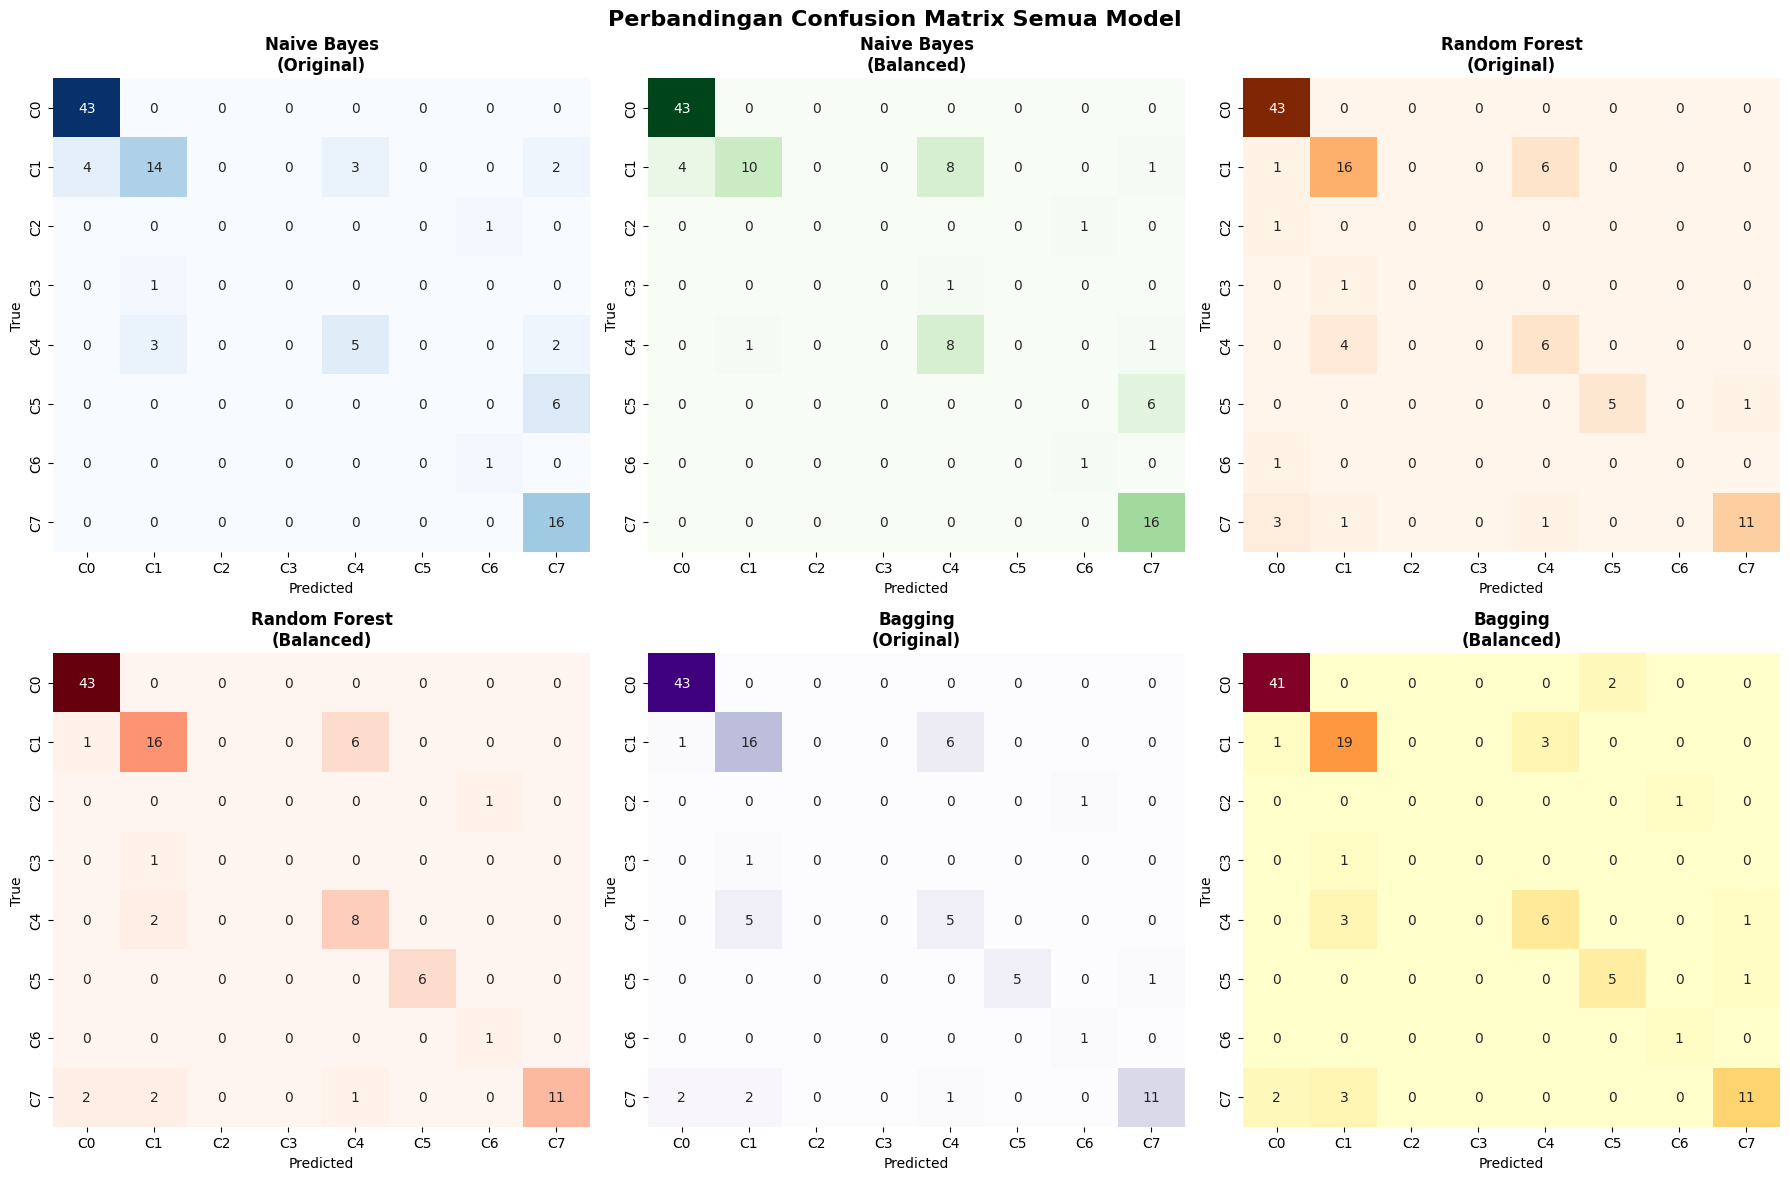


RINGKASAN PERFORMA PER KELAS:
Class    NB-Orig  NB-Bal   RF-Orig  RF-Bal   Bag-Orig  Bag-Bal 
-----------------------------------------------------------------
Class 0   1.000    1.000    1.000    1.000    1.000    0.953   
Class 1   0.609    0.435    0.696    0.696    0.696    0.826   
Class 2   0.000    0.000    0.000    0.000    0.000    0.000   
Class 3   0.000    0.000    0.000    0.000    0.000    0.000   
Class 4   0.500    0.800    0.600    0.800    0.500    0.600   
Class 5   0.000    0.000    0.833    1.000    0.833    0.833   
Class 6   1.000    1.000    0.000    1.000    1.000    1.000   
Class 7   1.000    1.000    0.688    0.688    0.688    0.688   
-----------------------------------------------------------------
Overall  0.782 0.772 0.802 0.842 0.802 0.822

BEST PERFORMER PER KELAS:
------------------------------
Class 0: NB-Orig (1.000)
Class 1: Bag-Bal (0.826)
Class 2: NB-Orig (0.000)
Class 3: NB-Orig (0.000)
Class 4: NB-Bal (0.800)
Class 5: RF-Bal (1.000)
Class 6: N

In [77]:
# Perbandingan Semua Confusion Matrix
print("="*80)
print("PERBANDINGAN SEMUA CONFUSION MATRIX")
print("="*80)

# Plot semua confusion matrix dalam satu figure
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Perbandingan Confusion Matrix Semua Model', fontsize=16, fontweight='bold')

# List model dan confusion matrix
models = [
    ('Naive Bayes\n(Original)', cm_nb_orig, 'Blues'),
    ('Naive Bayes\n(Balanced)', cm_nb_smote, 'Greens'),
    ('Random Forest\n(Original)', cm_rf_orig, 'Oranges'),
    ('Random Forest\n(Balanced)', cm_rf_smote, 'Reds'),
    ('Bagging\n(Original)', cm_bag_orig, 'Purples'),
    ('Bagging\n(Balanced)', cm_bag_smote, 'YlOrRd')
]

class_labels = [f'C{i}' for i in range(len(set(y_all)))]

for idx, (title, cm, cmap) in enumerate(models):
    row = idx // 3
    col = idx % 3
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, ax=axes[row, col],
                xticklabels=class_labels, yticklabels=class_labels,
                cbar=False)
    axes[row, col].set_title(title, fontweight='bold')
    axes[row, col].set_xlabel('Predicted')
    axes[row, col].set_ylabel('True')

plt.tight_layout()
plt.show()

# Ringkasan performa per kelas
print("\nRINGKASAN PERFORMA PER KELAS:")
print("="*50)
print(f"{'Class':<8} {'NB-Orig':<8} {'NB-Bal':<8} {'RF-Orig':<8} {'RF-Bal':<8} {'Bag-Orig':<9} {'Bag-Bal':<8}")
print("-" * 65)

all_cms = [cm_nb_orig, cm_nb_smote, cm_rf_orig, cm_rf_smote, cm_bag_orig, cm_bag_smote]

for i in range(len(set(y_all))):
    support = test_counts.get(i, 0)
    if support > 0:
        accuracies = []
        for cm in all_cms:
            acc = cm[i, i] / support
            accuracies.append(f"{acc:.3f}")
        
        print(f"Class {i:<3} {' '.join(f'{acc:<8}' for acc in accuracies)}")
    else:
        print(f"Class {i:<3} {'No test samples'}")

print("-" * 65)
overall_accs = [acc_nb_orig, acc_nb_smote, acc_rf_orig, acc_rf_smote, acc_bag_orig, acc_bag_smote]
overall_str = ' '.join(f'{acc:.3f}' for acc in overall_accs)

print(f"{'Overall':<8} {overall_str}")

# Identifikasi best performer per kelas
print(f"\nBEST PERFORMER PER KELAS:")
print("-" * 30)
model_names = ['NB-Orig', 'NB-Bal', 'RF-Orig', 'RF-Bal', 'Bag-Orig', 'Bag-Bal']

for i in range(len(set(y_all))):
    support = test_counts.get(i, 0)
    if support > 0:
        class_accs = []
        for cm in all_cms:
            class_accs.append(cm[i, i] / support)
        
        best_idx = class_accs.index(max(class_accs))
        best_model = model_names[best_idx]
        best_acc = class_accs[best_idx]
        
        print(f"Class {i}: {best_model} ({best_acc:.3f})")
    else:
        print(f"Class {i}: No test samples")